In [1]:
import matplotlib.pyplot as plt
import numpy as np
from bowzer.utils import open_json, get_models

In [25]:
models = get_models()

Loading: model_store/trained_20241023/model_163515/model_epochs_50_performance.json
Loading: model_store/trained_20241023/model_162315/model_epochs_25_performance.json
Loading: model_store/trained_20241023/model_161655/model_epochs_10_performance.json
Loading: model_store/trained_20241023/model_161345/model_epochs_5_performance.json


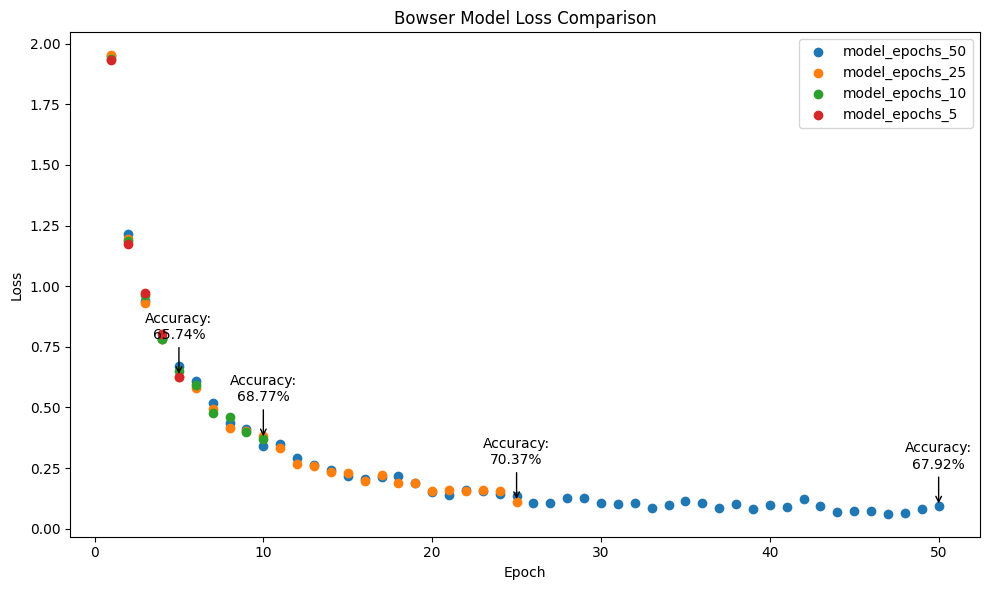

In [23]:
model_avg_losses = {}
for label in models:
    model_perf = open_json(f"{models[label]}_performance.json")
    epoch_avg_loss = []
    for  epoch in [x for x in model_perf.keys() if 'epoch' in x.lower()]:
        epoch_avg_loss.append(model_perf[epoch]['avg_loss'])
    accuracy = (100*sum(model_perf['correct']))/sum(model_perf['total'])
    model_avg_losses[label] = {'loss':epoch_avg_loss, 'accuracy':accuracy}

fig, ax = plt.subplots(figsize=(10, 6))
for label in model_avg_losses:
    total_loss = model_avg_losses[label]['loss']
    acc = model_avg_losses[label]['accuracy']
    epoch_range = range(1,len(total_loss)+1)
    plt.scatter(x = epoch_range, y = total_loss , label=f"{label}")
    ax.annotate(f'Accuracy:\n{acc:.2f}%', xy= (epoch_range[-1], total_loss[-1]), xytext=(0, 25), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle="->"),
            horizontalalignment='center', verticalalignment='bottom')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()
plt.title('Bowser Model Loss Comparison')
fig.tight_layout()
plt.show()

Loading: model_store/trained_20241023/model_163515/model_epochs_50_performance.json


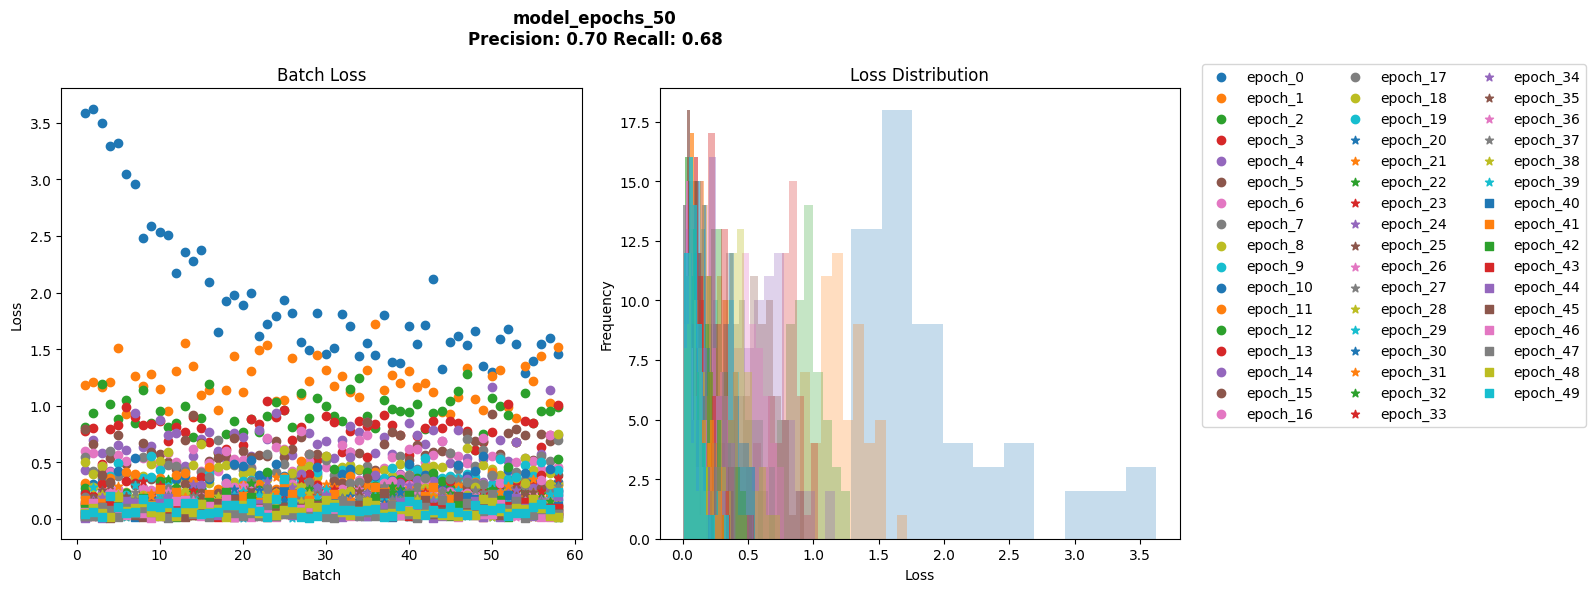

Loading: model_store/trained_20241023/model_162315/model_epochs_25_performance.json


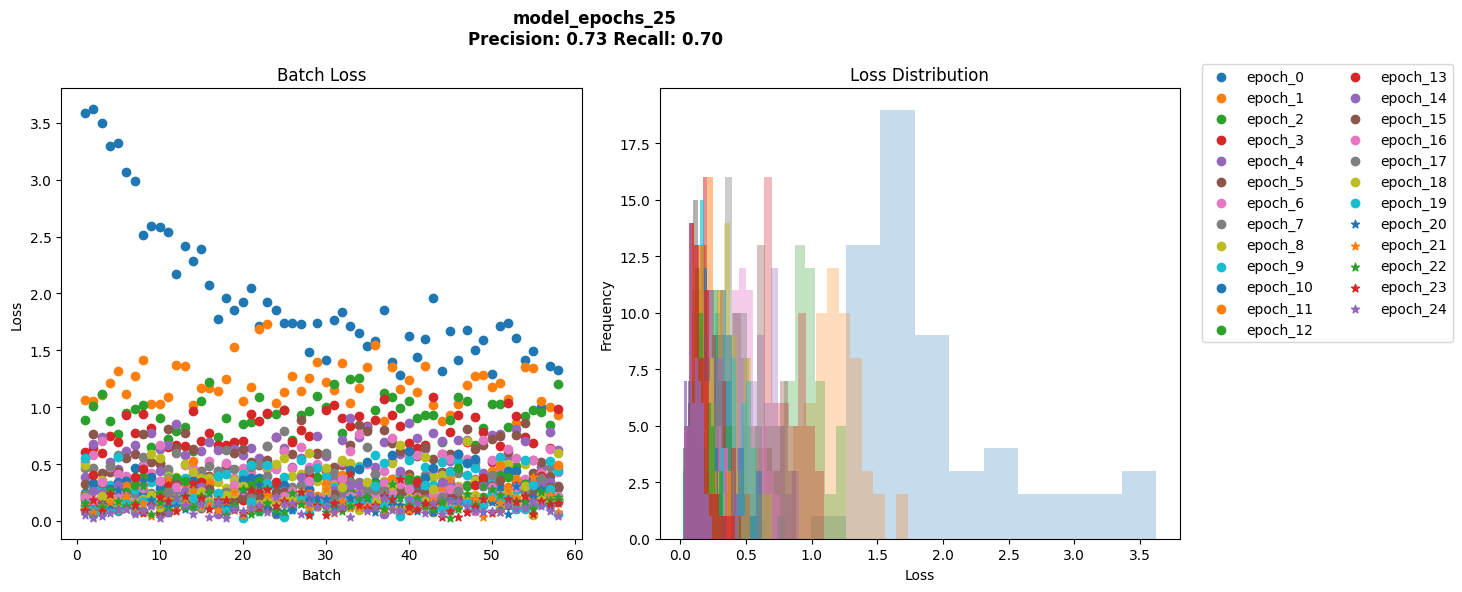

Loading: model_store/trained_20241023/model_161655/model_epochs_10_performance.json


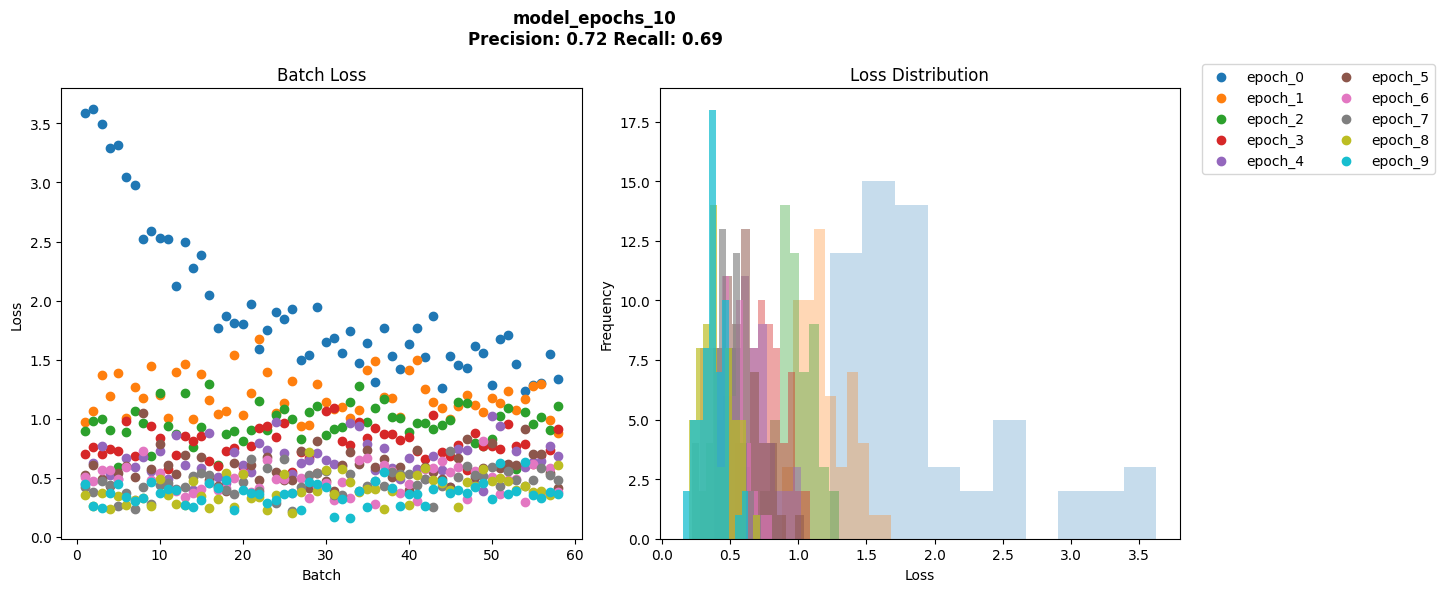

Loading: model_store/trained_20241023/model_161345/model_epochs_5_performance.json


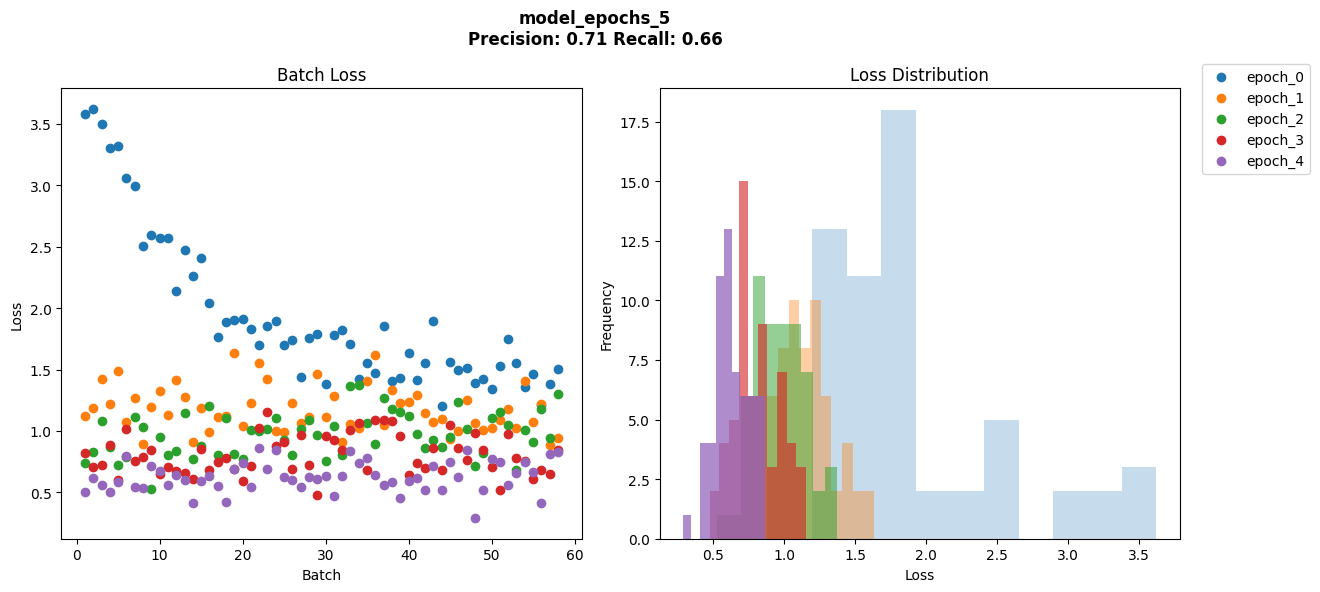

In [24]:
model_losses = {}
for label in models:
    model_perf = open_json(f"{models[label]}_performance.json")
    epoch_keys = [x for x in model_perf.keys() if 'epoch' in x.lower()]
    title = f"{label}\nPrecision: {model_perf['precision']:.2f} Recall: {model_perf['recall']:.2f}"
    
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    for idx, epoch in enumerate(epoch_keys):
        epoch_losses = model_perf[epoch]['loss_list']
        ax[0].scatter(x = np.linspace(1, len(epoch_losses), len(epoch_losses)).astype(int), y = epoch_losses , label=epoch, marker = ['o' if idx < 20 else '*' if idx >= 20 and idx <40 else 's'][0])
        ax[1].hist(epoch_losses, alpha=np.linspace(0.25, 0.75, len(epoch_keys)).astype(float)[idx] , label=epoch)
    ax[0].set_title('Batch Loss')
    ax[1].set_title('Loss Distribution')
    ax[0].set_xlabel('Batch')
    ax[0].set_ylabel('Loss')
    ax[1].set_xlabel('Loss')
    ax[1].set_ylabel('Frequency')

    fig.suptitle(title, size = 'large', weight='bold')
    lines, labels = ax[0].get_legend_handles_labels()[0], ax[0].get_legend_handles_labels()[1]
    fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(1, .9), ncol=round(len(epoch_keys)**(1/4)))
    fig.tight_layout()
    plt.show()